In [ ]:
!pip install -q opencv-python scikit-image scikit-learn tqdm

In [ ]:
# Upload kaggle.json (from your Kaggle account)
from google.colab import files
files.upload()

# Move to proper directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset (you must have accepted competition rules)
!kaggle competitions download -c dogs-vs-cats
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip

Saving kaggle.json to kaggle.json
 96% 782M/812M [00:07<00:00, 149MB/s]
100% 812M/812M [00:07<00:00, 114MB/s]


In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
from skimage import color

# Define path to training images
DATA_DIR = "/content/train"
IMG_SIZE = 128  # Resize images

def extract_hog_features(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        gray = color.rgb2gray(img)

        features = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')
        return features
    except:
        return None

def load_data(data_dir, max_images=2000):
    features = []
    labels = []
    image_files = [f for f in os.listdir(data_dir) if f.endswith(".jpg")]

    for i, filename in enumerate(tqdm(image_files[:max_images])):
        label = 1 if "dog" in filename else 0
        path = os.path.join(data_dir, filename)
        hog_features = extract_hog_features(path)
        if hog_features is not None:
            features.append(hog_features)
            labels.append(label)

    return np.array(features), np.array(labels)


In [ ]:
# Load data
X, y = load_data(DATA_DIR, max_images=2000)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))


100%|██████████| 2000/2000 [00:19<00:00, 103.38it/s]


Accuracy: 0.645
              precision    recall  f1-score   support

         Cat       0.65      0.63      0.64       202
         Dog       0.64      0.66      0.65       198

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.65      0.65      0.64       400



🔍 Accuracy: 0.645

📄 Classification Report:
               precision    recall  f1-score   support

         Cat       0.65      0.63      0.64       202
         Dog       0.64      0.66      0.65       198

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.64       400
weighted avg       0.65      0.65      0.64       400



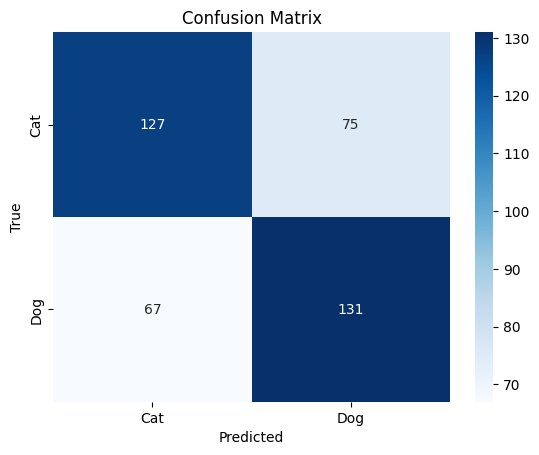

In [ ]:
# 🧠 Train the SVM model
model = SVC(kernel='linear')  # You can change to 'rbf' or 'poly'
model.fit(X_train, y_train)

# ✅ Predict on the test set
y_pred = model.predict(X_test)

# 📊 Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy and classification report
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Cat", "Dog"]))

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


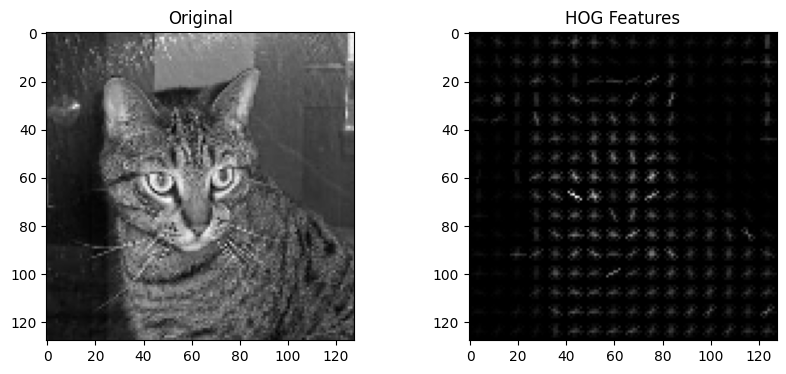

In [ ]:
import matplotlib.pyplot as plt
from skimage import exposure

def visualize_hog(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    gray = color.rgb2gray(image)

    features, hog_image = hog(gray,
                              orientations=9,
                              pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2),
                              visualize=True,
                              block_norm='L2-Hys')

    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(gray, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("HOG Features")
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.show()

# Example:
visualize_hog('/content/train/cat.1.jpg')


In [ ]:
def predict_from_dataset(filename, model, base_dir='/content/train', img_size=128):
    import matplotlib.pyplot as plt
    from skimage.feature import hog
    from skimage import color

    try:
        path = os.path.join(base_dir, filename)
        img = cv2.imread(path)
        img = cv2.resize(img, (img_size, img_size))
        gray = color.rgb2gray(img)

        features = hog(gray,
                       orientations=9,
                       pixels_per_cell=(8, 8),
                       cells_per_block=(2, 2),
                       block_norm='L2-Hys')

        features = features.reshape(1, -1)
        prediction = model.predict(features)[0]
        label = "Dog" if prediction == 1 else "Cat"

        # Display the image and prediction
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Prediction: {label} ({filename})")
        plt.axis('off')
        plt.show()

        return label
    except Exception as e:
        print("Error:", e)
        return None


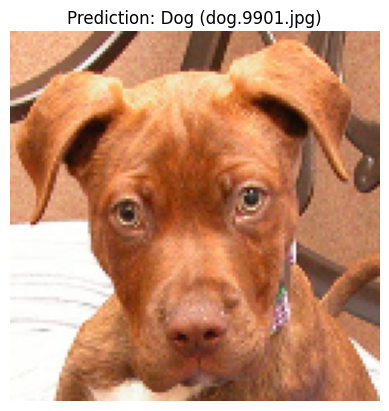

'Dog'

In [ ]:
predict_from_dataset('dog.9901.jpg', model)


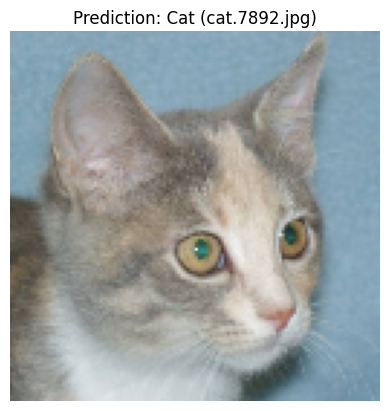

'Cat'

In [ ]:
predict_from_dataset('cat.7892.jpg', model)
